In [1]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical
import keras

import matplotlib.pyplot as plt
%matplotlib inline

(X_train, y_train), (X_test, y_test) = mnist.load_data() # numpy arrays

##############################
## Preprocessing
##############################

# Set batch, classes, epochs
batch_size = 128
num_classes = 10

# MNIST images only have a depth of 1, but we must explicitly declare that
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

# Change feature time
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize; we use 255 because our image is grayscale which has a max value of 255
X_train /= 255.0
X_test /= 255.0

# Change Y values to categories
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

##############################
## Modeling
##############################

'''
    Layout

    We have our original image which is 28 x 28 with 1 channel so it's a grayscale image.

    We then do the convolution operation with the 5 x 5 kernel and then there are 32 filters.

    We then do a pooling so our image drops from 24 x 24 to 12 x 12.

    We then do another convolution operation with the 5 x 5 kernel and this time with 64 filters.

    We do another pooling. Again, we see a reduction in our image by half. That's from 8 x 8 to 4 x 4.

    Finally, there's a flattening so there's a fully connected network. Then we've got the output. We've 
    got all of the 1,024 notes terminating in the 10 outputs. The 10 outputs correspond to the ten digits, 
    zero to nine.
'''

# Instantiate model
cnn = Sequential()

# Add convolutional layer  with 32 outputs with pooling
# 32 filters, kernel size, input_shape is grayscale image dimensions
cnn.add(Conv2D(32, kernel_size=(5, 5),input_shape=(28, 28, 1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())

# Add convolutional layer  with 32 outputs with pooling
# 64 filters, kernel size, input_shape is grayscale image dimensions
cnn.add(Conv2D(64, kernel_size=(5, 5),padding='same', activation='relu'))
cnn.add(MaxPooling2D())

# Flatten the data to input into dense layer of 1
# Flatten the network is because we've got a dense network or a fully connected network coming next
cnn.add(Flatten())

# Add dense layer with a relu activation function
cnn.add(Dense(64, activation='relu'))

# Add dense layer with a softmax activation function for classification
cnn.add(Dense(10, activation='softmax'))

# Compile the model and add loss, optimizer, metrics
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
print(cnn.summary())

# We have zero parameters for max pooling and for flatten. This is because it computes a fixed function of the input.

# Fit the model
cnn_model = cnn.fit(X_train,
                    y_train,
                    epochs=20,
                    verbose=1, # show training
                    validation_data=(X_test, y_test))

# Evaluate
error_rate = cnn.evaluate(X_test, # features
                          y_test) # expected output

# Save the model
cnn.save('cnn_model.h5')

Using TensorFlow backend.


(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                200768    
________

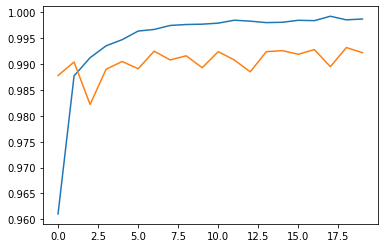

In [4]:
##############################
## Plotting
##############################

# Load dense model
model = keras.models.load_model('dense_model.h5')

# Plot CNN model
plt.plot(cnn_model.history['acc'])     # blue
plt.plot(cnn_model.history['val_acc']) # orange

# # Plot the accuracy
# plt.plot(model.history['acc']) # blue
# plt.plot(model.history['val_acc']) # orange
# plt.plot(model.history['loss']) # green

plt.show() 